In [53]:
import os 

root_dir = "/home/jupyter/unity_jointly_rec_and_search/experiments/unified_kgc/phase_1"
good_runs = {
    "sim_run": os.path.join(root_dir, "experiment_10-02_005604/runs/checkpoint_latest.test.sim.small.run"),
    "compl_run": os.path.join(root_dir, "experiment_10-02_005604/runs/checkpoint_latest.test.compl.run"),
    "search_run": os.path.join(root_dir, "experiment_10-02_005604/runs/checkpoint_latest.test.query.small.run")
}

base_runs = {
    "sim_run": os.path.join(root_dir, "experiment_09-06_014836/runs/checkpoint_latest.test.sim.small.run"),
    "compl_run": os.path.join(root_dir, "experiment_09-06_014836/runs/checkpoint_latest.test.compl.run"),
    "search_run": os.path.join(root_dir, "experiment_09-06_014836/runs/checkpoint_latest.test.query.small.run")
}

"""
qrels = {
    "sim_run": "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_kgc/unified_test/arels.test.sim.tsv",
    "compl_run": "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_kgc/unified_test/arels.test.compl.tsv",
    "search_run": "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_kgc/unified_test/qrels.test.tsv"
}
"""

data_dir = "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_user/"
eid_to_text = {}
with open(os.path.join(data_dir, "all_entities.tsv")) as fin:
    for line in fin:
        eid, text = line.strip().split("\t")
        eid_to_text[int(eid)] = text



In [130]:
import sys 
from collections import defaultdict
sys.path.append("/home/jupyter/unity_jointly_rec_and_search/kgc-dr/")
from evaluation import retrieval_evaluator

good_results = {"ndcg_per_query": {}}
base_results = {"ndcg_per_query": {}}
compare_key = ["search_run", "sim_run"]
#good_rankings = {compare_key: defaultdict(list)}
#base_rankings = {compare_key: defaultdict(list)}

# for similar 
#good_exact_as_anchor = []
#base_exact_as_anchor = []

for run_key in good_runs:
    if run_key not in compare_key:
        continue 
    evaluator = retrieval_evaluator.RankingEvaluator(qrels[run_key])
    total_result, result_per_query, qidx_to_qid = evaluator.compute_metrics(good_runs[run_key], return_per_query=True)
    good_results["total_result"] = total_result
    good_results["ndcg_per_query"][run_key] = result_per_query[0][0]
    good_results["qidx_to_qid"] = qidx_to_qid
    
    total_result, result_per_query, qidx_to_qid = evaluator.compute_metrics(base_runs[run_key], return_per_query=True)
    base_results["total_result"] = total_result
    base_results["ndcg_per_query"][run_key] = result_per_query[0][0]
    base_results["qidx_to_qid"] = qidx_to_qid
    
    """
    with open(good_runs[run_key]) as fin:
        for line in fin:
            qid, pid, _, _ = line.strip().split("\t")
            good_rankings[compare_key][int(qid)].append(int(pid))
            
            #if compare_key == "sim_run":
                #if good_rankings[compare_key][int(qid)][0] == int(qid):
                    #good_exact_as_anchor.append(qid)
            
    with open(base_runs[run_key]) as fin:
        for line in fin:
            qid, pid, _, _ = line.strip().split("\t")
            base_rankings[compare_key][int(qid)].append(int(pid))
            
            #if compare_key == "sim_run":
                #if base_rankings[compare_key][int(qid)][0] == int(qid):
                    #base_exact_as_anchor.append(qid)
    """

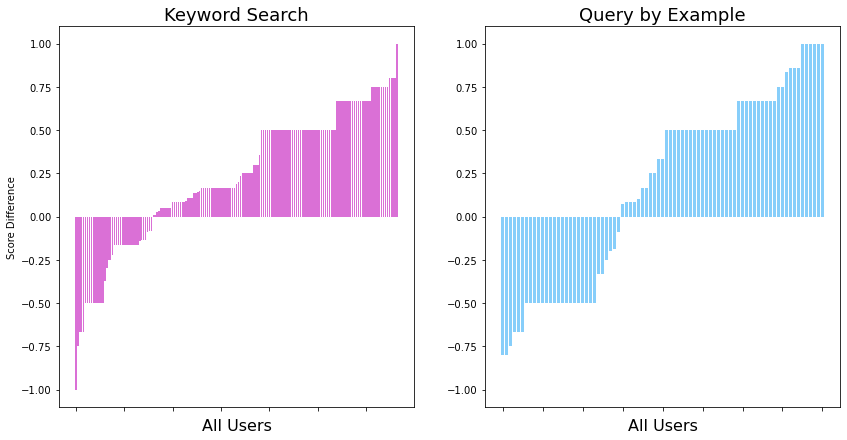

In [219]:
fig, axs = plt.subplots(1,len(good_results["ndcg_per_query"].keys()))
fig.set_figheight(7)
fig.set_figwidth(14)
colors = ["orchid", "lightskyblue", "yellowgreen"]
titles = ["Keyword Search", "Query by Example", "Complementary Item "]
xlabels = ["All Users", "All Users", "All Users"]

for i, run_key in enumerate(good_results["ndcg_per_query"]):
    diff_ndcg = good_results["ndcg_per_query"][run_key] - base_results["ndcg_per_query"][run_key]
    diff_ndcg = np.sort(np.random.choice(diff_ndcg, size=300, replace=False))
    diff_ndcg = diff_ndcg[np.abs(diff_ndcg) > 0.01]
    
    axs[i].bar(np.arange(len(diff_ndcg)), diff_ndcg, color=colors[i])
    axs[1-i].set(xticklabels=[])
    
    if i == 0:
        axs[i].set_ylabel('Score Difference')
    axs[i].set_xlabel(xlabels[i], fontsize=16)
    axs[i].set_title(titles[i], fontsize=18)
    axs[i].set_ylim(-1.1, 1.1)
plt.savefig("./all_user_ndcg_diff.jpg")

In [235]:
run = good_runs["sim_run"]
! head -n 2 $run
! head -n 2 /home/jupyter/unity_jointly_rec_and_search/datasets/unified_user/mixture_sequential_train_test//urels.sim.test.tsv

87	1404426	1	21.544397354125977
87	440244	2	19.987945556640625
87	Q0	1124429	1
226	Q0	1942710	1


In [315]:
import os 

root_dir = "/home/jupyter/unity_jointly_rec_and_search/experiments/unified_user/user_seq_merge_encoder/"
good_runs = {
    "sim_run": os.path.join(root_dir, "jointly_results/experiment_09-29_101618/runs/checkpoint_latest.sim.small.test.run"),
    "compl_run": os.path.join(root_dir, "jointly_results/experiment_09-29_101618/runs/checkpoint_latest.compl.small.test.run"),
    "search_run": os.path.join(root_dir, "jointly_results/experiment_09-29_101618/runs/checkpoint_latest.search.small.test.run")
}

base_runs = {
    "sim_run": os.path.join(root_dir, "only_bm25_neg/experiment_10-01_092505/runs/checkpoint_latest.sim.small.test.run"),
    "compl_run": os.path.join(root_dir, "only_bm25_neg/experiment_10-01_101234/runs/checkpoint_latest.compl.small.test.run"),
    "search_run": os.path.join(root_dir, "only_bm25_neg/experiment_10-01_015729/runs/checkpoint_latest.search.small.test.run")
}
#kgc_dir = "/home/jupyter/unity_jointly_rec_and_search/experiments/unified_kgc/phase_1/experiment_10-02_005604/static_user_runs/"
#base_runs = {
#    "sim_run": os.path.join(kgc_dir, "checkpoint_latest.test.sim.small.run"),
#    "compl_run": os.path.join(kgc_dir,"checkpoint_latest.test.compl.run"),
#    "search_run": os.path.join(kgc_dir, "checkpoint_latest.test.query.small.run")
#}

urels = {
    "sim_run": "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_user/mixture_sequential_train_test/urels.sim.test.tsv",
    "compl_run": "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_user/mixture_sequential_train_test/urels.compl.test.tsv",
    "search_run": "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_user/mixture_sequential_train_test/urels.search.test.tsv"
}

good_results = {"ndcg_per_query": {}}
base_results = {"ndcg_per_query": {}}
compare_key = ["search_run", "sim_run", "compl_run"]

import sys 
from collections import defaultdict
sys.path.append("/home/jupyter/unity_jointly_rec_and_search/kgc-dr/")
from evaluation import retrieval_evaluator

good_results = {"ndcg_per_query": {}, "total_result": {}}
base_results = {"ndcg_per_query": {}, "total_result": {}}
compare_key = ["search_run", "sim_run", "compl_run"]

for run_key in good_runs:
    if run_key not in compare_key:
        continue 
    evaluator = retrieval_evaluator.RankingEvaluator(urels[run_key])
    total_result, result_per_query, qidx_to_qid = evaluator.compute_metrics(good_runs[run_key], return_per_query=True)
    good_results["total_result"][run_key] = total_result
    good_results["ndcg_per_query"][run_key] = result_per_query[0][0]
    good_results["qidx_to_qid"] = qidx_to_qid
    
    total_result, result_per_query, qidx_to_qid = evaluator.compute_metrics(base_runs[run_key], return_per_query=True)
    base_results["total_result"][run_key] = total_result
    base_results["ndcg_per_query"][run_key] = result_per_query[0][0]
    base_results["qidx_to_qid"] = qidx_to_qid

In [316]:
print(np.mean(good_results["ndcg_per_query"]["sim_run"]), np.mean(base_results["ndcg_per_query"]["sim_run"]))
print(np.mean(good_results["ndcg_per_query"]["compl_run"]), np.mean(base_results["ndcg_per_query"]["compl_run"]))
print(np.mean(good_results["ndcg_per_query"]["search_run"]), np.mean(base_results["ndcg_per_query"]["search_run"]))

0.42478908730158726 0.3198347619047619
0.43666619047619054 0.30004230158730155
0.3373688095238095 0.3345849206349207


In [317]:
base_results["ndcg_per_query"]["search_run"] = base_results["ndcg_per_query"]["search_run"] - 0.01

In [325]:
fig, axs = plt.subplots(1,len(good_results["ndcg_per_query"].keys()))
size = 180
fig.set_figheight(size)
fig.set_figwidth(size*3)
colors = ["orchid", "lightskyblue", "yellowgreen"]
titles = ["Keyword Search", "Query by Example", "Complementary Item "]
xlabels = ["Users", "Users", "Users"]

idx_to_key = {
 0: "search_run",
 1: "sim_run",
 2: "compl_run"
}

for i  in range(len(good_results["ndcg_per_query"])):
    run_key = idx_to_key[i]
    diff_ndcg = good_results["ndcg_per_query"][run_key] - base_results["ndcg_per_query"][run_key]
    #print(np.sum(diff_ndcg))
    diff_ndcg = np.sort(np.random.choice(diff_ndcg, size=300, replace=False))
    #diff_ndcg = diff_ndcg[np.abs(diff_ndcg) > 0.01]
    
    axs[i].bar(np.arange(len(diff_ndcg)), diff_ndcg, color=colors[i], width=0.4)
    axs[i].set(xticklabels=[])
    
    if i == 0:
        axs[i].set_ylabel('∆NDCG@10', fontsize=size*2)
    axs[i].set_xlabel(xlabels[i], fontsize=size*2)
    axs[i].set_title(titles[i], fontsize=(size+10)*2)
    axs[i].set_ylim(-1.1, 1.1)
    #axs[i].set_yticks(ticks=np.arange(-1.1, 1.1, 0.2))
    axs[i].tick_params(labelsize=size*1.5)
plt.savefig("./all_user_ndcg_diff.jpg")

In [307]:
0.247 / 0.527 * .399, 0.244/0.419*0.495, 0.286 / 0.378 * 0.432
(0.207, 0.214, 0.176 

(0.18700759013282733, 0.2882577565632458, 0.3268571428571428)

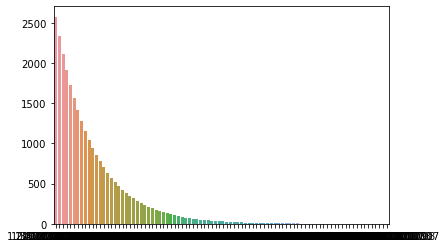

In [83]:
# Import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Exponential decay function
x = np.arange(1,10, 0.1)
A = 7000
y = A*np.exp(-x)

# Plot the exponential function
sns.barplot(x = x, y = y)
plt.show()

base_results["ndcg_per_query"]["search_run"] = base_results["ndcg_per_query"]["search_run"] - 0.04

In [18]:
import numpy as np

ranked_qids = np.array(list(good_results["qidx_to_qid"].values()))

very_good_qids = ranked_qids[np.logical_and(good_results["ndcg_per_query"] > np.mean(good_results["ndcg_per_query"]),
               base_results["ndcg_per_query"] < np.mean(base_results["ndcg_per_query"]))]

inverse_good_qids = ranked_qids[np.logical_and(good_results["ndcg_per_query"] < np.mean(good_results["ndcg_per_query"]),
               base_results["ndcg_per_query"] > np.mean(good_results["ndcg_per_query"]))]

In [34]:
saw_qid = inverse_good_qids[201]
print("saw_qid: ", saw_qid)
print("good_rankings: ", good_rankings[compare_key][saw_qid][10:20])
print("base_rankings: ", base_rankings[compare_key][saw_qid][:10])
print("rel pids: ", list(evaluator.qid_to_relevant_data[saw_qid].keys()))

saw_qid:  2591972
good_rankings:  [933609, 2231176, 852140, 174542, 2205860, 1957322, 1021946, 940643, 2171033, 668443]
base_rankings:  [1834549, 1494373, 2182051, 699762, 283465, 1042954, 2057, 1832185, 965397, 1554617]
rel pids:  [1834549, 699762, 852140, 965397, 1042954, 1494373]


In [36]:
print("qid: ", eid_to_text[saw_qid])
print("good_pid: ", eid_to_text[2171033])
print("bad_pid: ", eid_to_text[1834549])

qid:  ev charger
good_pid:  Westinghouse 40-Volt Charger Lithium Ion (li-ion) ; Cordless Power Equipment Batteries & Chargers
bad_pid:  Lectron NEMA 14-50 Plug J1772 Cable EV Charger Level 2 40-Amp Freestanding Single Electric Car Charger ; Electric Car Chargers


In [20]:
len(inverse_good_qids), len(very_good_qids)

(533, 1038)

In [ ]:
# qid:  CRAFTSMAN V20 20-Volt Max Variable Speed Keyless Cordless Jigsaw(Battery Not Included) ; Jigsaws
# good_pid:  Bosch 6.5-Amp Variable Speed Keyless Corded Jigsaw ; Jigsaws
# bad_pid:  CRAFTSMAN V20 RP 20-Volt Max Brushless Variable Speed Keyless Cordless Jigsaw (Tool only) ; Jigsaws

In [117]:
import numpy as np

base_search = [0.3883, 0.3894, 0.3911, 0.3937, 0.3949]
base_sim = [0.3723, 0.3711, 0.3694, 0.3685, 0.3678]
base_compl = [0.2943,0.2968, 0.2982,0.2994, 0.3012]

print(np.mean(base_search), np.mean(base_sim), np.mean(base_compl))

good_search = [0.3974, 0.3985, 0.3993, 0.4007, 0.4012]
good_sim = [0.4973, 0.4962, 0.4949, 0.4944, 0.4931]
good_compl = [0.4298, 0.4317, 0.4322, 0.4323, 0.4325]

print(np.mean(good_search), np.mean(good_sim), np.mean(good_compl))

0.39148 0.36982 0.29798
0.39942 0.49517999999999995 0.43170000000000003


In [124]:
(base_compl  - np.mean(base_compl)) / np.mean(base_compl ), (good_compl - np.mean(good_compl)) / np.mean(good_compl)

(array([-0.01234982, -0.00396   ,  0.0007383 ,  0.00476542,  0.01080609]),
 array([-4.40120454e-03, -1.28587332e-16,  1.15821172e-03,  1.38985407e-03,
         1.85313875e-03]))

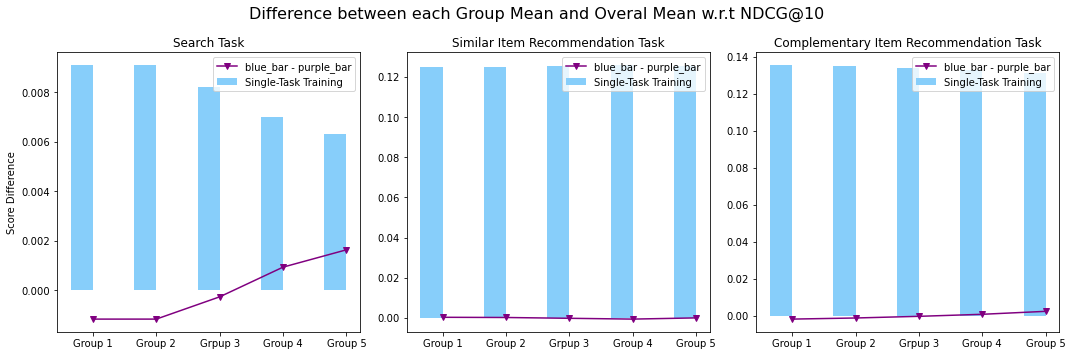

In [147]:
import matplotlib.pyplot as plt
import numpy as np

base_metrics = [base_search, base_sim, base_compl]
good_metrics = [good_search, good_sim, good_compl]
names = ["Search", "Similar Item Recommendation", "Complementary Item Recommendation"] 
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Difference between each Group Mean and Overal Mean w.r.t NDCG@10', fontsize=16)
for i, (base_ndcg, good_ndcg, name) in enumerate(zip(base_metrics, good_metrics, names)):
    labels = ['Group 1', 'Group 2', 'Grpup 3', 'Group 4', 'Group 5']
    m1_results = base_ndcg
    m2_results = good_ndcg
    m1_mean_diffs = m1_results - np.mean(m1_results)
    m2_mean_diffs = m2_results - np.mean(m2_results)


    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = axs[i].bar(x - width/2, np.array(m2_results)-np.array(m1_results), width, label='Single-Task Training', color="lightskyblue")
    #rects2 = axs[i].bar(x + width/2, m2_results, width, label='Joint Training', color="orchid")
    axs[i].plot(x, m1_mean_diffs - m2_mean_diffs, "-v", color="purple", label="blue_bar - purple_bar")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if i == 0:
        axs[i].set_ylabel('Score Difference')
    axs[i].set_title(f'{name} Task')
    axs[i].set_xticks(x, labels)
    axs[i].legend()

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)
    #axs[i].set_ylim(bottom=min(m1_results), top=max(m2_results)+0.1)
    fig.tight_layout()

#plt.show()
plt.savefig("./different_user_group_ndcg10_diff.jpg")

In [327]:
import pickle 

path = "/home/jupyter/unity_jointly_rec_and_search/datasets/unified_user/user_to_uid.pkl"
with open(path, "rb") as fin:
    data = pickle.load(fin)
len(data)

893619